In [46]:
# Pandas Groupby
import pandas as pd
import numpy as np

# Spliting
## Spliting

In [47]:
# Set sample df
df = pd.DataFrame([('bird', 'Falconiformes', 389.0),
                   ('bird', 'Psittaciformes', 24.0),
                   ('mammal', 'Carnivora', 80.2),
                   ('mammal', 'Primates', np.nan),
                   ('mammal', 'Carnivora', 58)],
                  index=['falcon', 'parrot', 'lion', 'monkey', 'leopard'],
                  columns=('class', 'order', 'max_speed'))

In [48]:
# Groupby df
display(df)
# .groupby 将会生成一个对象
grouped = df.groupby('class')
# 可以转换为df来看其中内容
pd.DataFrame(grouped)

,class,order,max_speed
falcon,bird,Falconiformes,389.0
parrot,bird,Psittaciformes,24.0
lion,mammal,Carnivora,80.2
monkey,mammal,Primates,NaN
leopard,mammal,Carnivora,58.0


,0,1
0,bird,class order max_speed falcon...
1,mammal,class order max_speed lion ...


In [53]:
# testing
df = pd.DataFrame([('bird', 'Falconiformes', 389.0, 100),
                   ('bird', 'Psittaciformes', 24.0, 90),
                   ('mammal', 'Carnivora', 80.2, 80),
                   ('mammal', 'Primates', np.nan, 70),
                   ('mammal', 'Carnivora', 58, 60)],
                  index=['falcon', 'parrot', 'lion', 'monkey', 'leopard'],
                  columns=('class', 'order', 'max_speed','weight'))

grouped = df.groupby('class')
grouped.max()

,order,max_speed,weight
class,,,
bird,Psittaciformes,389.0,100
mammal,Primates,80.2,80


In [4]:
# 方向
## default is axis=0 对行做聚合，1 为对列做聚合，也可以 axis='columns'
grouped = df.groupby('order',axis = 1)
pd.DataFrame(grouped)
## 因为是对列做group所以输出为空 _

""


In [5]:
# 联合
grouped = df.groupby(['class','order'])
pd.DataFrame(grouped)
## 输出（0）为bird，mammal与Falconiformes，Psittaciformes，Primates）的组合

,0,1
0,"(bird, Falconiformes)",class order max_speed falcon ...
1,"(bird, Psittaciformes)",class order max_speed parrot...
2,"(mammal, Carnivora)",class order max_speed lion ...
3,"(mammal, Primates)",class order max_speed monkey ma...


The mapping can be specified many different ways:

  * A Python function, to be called on each of the axis labels.
  * A list or NumPy array of the same length as the selected axis.
  * A dict or `Series`, providing a `label -> group name` mapping.
  * For `DataFrame` objects, a string indicating a column to be used to group. Of course `df.groupby('A')` is just syntactic sugar for `df.groupby(df['A'])`, but it makes life simpler.
  * For `DataFrame` objects, a string indicating an index level to be used to group.
  * A list of any of the above things.

Collectively we refer to the grouping objects as the **keys**. For example, consider the following `DataFrame`:

Note: A string passed to `groupby` may refer to either a column or an index level. If a string matches both a column name and an index level name, a `ValueError` will be raised.

On a DataFrame, we obtain a GroupBy object by calling groupby(). We could naturally group by either the A or B columns, or both:

In [6]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,1.643291,0.135934
1,bar,one,-0.737708,-0.362008
2,foo,two,-0.448303,-1.002944
3,bar,three,0.388754,1.054417
4,foo,two,0.240245,-1.391441
5,bar,two,-1.319281,0.885096
6,foo,one,-0.717501,-1.512687
7,foo,three,-0.092230,0.252915


In [7]:
grouped = df.groupby('A')
pd.DataFrame(grouped)

,0,1
0,bar,A B C D 1 bar on...
1,foo,A B C D 0 foo on...


In [8]:
grouped = df.groupby(['A', 'B'])
pd.DataFrame(grouped)

,0,1
0,"(bar, one)",A B C D 1 bar one -0...
1,"(bar, three)",A B C D 3 bar thre...
2,"(bar, two)",A B C D 5 bar two -1...
3,"(foo, one)",A B C D 0 foo one 1...
4,"(foo, three)",A B C D 7 foo three...
5,"(foo, two)",A B C D 2 foo two -0...


In [9]:
# 联合索引
## If we also have a MultiIndex on columns A and B, we can group by all but the specified columns
## 注意这里输出的最后 A 的 foo 对应 B 的 one 和 three
df2 = df.set_index(['A', 'B'])
df2

C         D
A   B                        
foo one    1.643291  0.135934
bar one   -0.737708 -0.362008
foo two   -0.448303 -1.002944
bar three  0.388754  1.054417
foo two    0.240245 -1.391441
bar two   -1.319281  0.885096
foo one   -0.717501 -1.512687
    three -0.092230  0.252915

**Note that no splitting occurs until it’s needed. Creating the GroupBy object only verifies that you’ve passed a valid mapping.**

In [10]:
# 对比如下输出
grouped = df2.groupby(level=df2.index.names.difference(['B']))
## 上面的 df2.index.names.difference(['B']) 的输出是 df2.index.names.difference(['B'])
## 代表用‘A’列做groupby， 和 level=0 指定第一列效果相通
display(grouped.sum())
grouped = df2.groupby(level=df2.index.names.difference(['A']))
display(grouped.sum())

,C,D
A,,
bar,-1.668235,1.577505
foo,0.625501,-3.518223


,C,D
B,,
one,0.188082,-1.738761
three,0.296524,1.307331
two,-1.527340,-1.509289


In [11]:
# pandas Index objects support duplicate values. 
# If a non-unique index is used as the group key in a groupby operation, 
# all values for the same index value will be considered to be in one group 
# and thus the output of aggregation functions will only contain unique index values:
lst = [1, 2, 3, 1, 2, 3]
s = pd.Series([1, 2, 3, 10, 20, 30], lst)
grouped = s.groupby(level=0)
display(grouped.first())
display(grouped.last())
display(grouped.sum())

1    1
2    2
3    3
dtype: int64

1    10
2    20
3    30
dtype: int64

1    11
2    22
3    33
dtype: int64

## Groupby sorting

In [12]:
# groupby 默认 sorting 
df2 = pd.DataFrame({'X': ['B', 'B', 'A', 'A'], 'Y': [1, 2, 3, 4]})
display(df2.groupby('X').sum())
display(df2.groupby(['X'], sort=False).sum())
## 注意groupby如果只输入一个index可以直接在小括弧中，也可按照多index用列表。参看上面2，3代码行
## groupby will preserve the order in which observations are sorted within each group.
## 对于组内则不会进行排序
df2.groupby(['X']).get_group('B')

,Y
X,
A,7
B,3


,Y
X,
B,3
A,7


,X,Y
0,B,1
1,B,2


## Groupby object attributes
- 说明 https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html
- 例子是 .groups

In [13]:
# .groups
display(df)
display(df.groupby('A').groups)

## 定义函数进行元音和辅音的区分
def get_letter_type(letter):
    if letter.lower() in 'aeiou':
        return 'vowel'
    else:
        return 'consonant'

## groupby 直接调用函数进行spliting 
display(df.groupby(get_letter_type, axis=1).groups)

grouped = df.groupby(['A', 'B'])
display(grouped.groups)

## Calling the standard Python len function on the GroupBy object just returns 
## the length of the groups dict, so it is largely just a convenience:

len(grouped)

,A,B,C,D
0,foo,one,1.643291,0.135934
1,bar,one,-0.737708,-0.362008
2,foo,two,-0.448303,-1.002944
3,bar,three,0.388754,1.054417
4,foo,two,0.240245,-1.391441
5,bar,two,-1.319281,0.885096
6,foo,one,-0.717501,-1.512687
7,foo,three,-0.092230,0.252915


{'bar': Int64Index([1, 3, 5], dtype='int64'),
 'foo': Int64Index([0, 2, 4, 6, 7], dtype='int64')}

{'consonant': Index(['B', 'C', 'D'], dtype='object'),
 'vowel': Index(['A'], dtype='object')}

{('bar', 'one'): Int64Index([1], dtype='int64'),
 ('bar', 'three'): Int64Index([3], dtype='int64'),
 ('bar', 'two'): Int64Index([5], dtype='int64'),
 ('foo', 'one'): Int64Index([0, 6], dtype='int64'),
 ('foo', 'three'): Int64Index([7], dtype='int64'),
 ('foo', 'two'): Int64Index([2, 4], dtype='int64')}

6

In [14]:
# GroupBy will tab complete column names (and other attributes):
df
gb = df.groupby('A')

## 输入时候可以看到 所有 attributes
#gb.agg        gb.boxplot    gb.cummin     gb.describe   gb.filter     gb.get_group  gb.height     gb.last       gb.median     gb.ngroups    gb.plot       gb.rank       gb.std        gb.transform
#gb.aggregate  gb.count      gb.cumprod    gb.dtype      gb.first      gb.groups     gb.hist       gb.max        gb.min        gb.nth        gb.prod       gb.resample   gb.sum        gb.var
#gb.apply      gb.cummax     gb.cumsum     gb.fillna     gb.gender     gb.head       gb.indices    gb.mean       gb.name       gb.ohlc       gb.quantile   gb.size       gb.tail       gb.weight

## 所有 API 说明 https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html

## Groupby with MultiIndex

In [15]:
#pd.DataFrame(gb).boxplot
arrays = [['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]

index = pd.MultiIndex.from_arrays(arrays, names=['first', 'second'])

s = pd.Series(np.random.randn(8), index=index)
s

first  second
bar    one       0.309338
       two       0.325150
baz    one       0.715957
       two       1.143081
foo    one       0.119132
       two       1.488887
qux    one       0.012805
       two      -0.294500
dtype: float64

In [16]:
grouped = s.groupby(level=0)
display(grouped.sum())
grouped = s.groupby(level='second')
display(grouped.sum())
# level 可以按照序列号或者名称来指定
grouped = s.groupby(level=[0,1])
display(grouped.sum())
# Index level names may be supplied as keys
s.groupby(['first', 'second']).sum()

first
bar    0.634487
baz    1.859038
foo    1.608019
qux   -0.281696
dtype: float64

second
one    1.157232
two    2.662617
dtype: float64

first  second
bar    one       0.309338
       two       0.325150
baz    one       0.715957
       two       1.143081
foo    one       0.119132
       two       1.488887
qux    one       0.012805
       two      -0.294500
dtype: float64

first  second
bar    one       0.309338
       two       0.325150
baz    one       0.715957
       two       1.143081
foo    one       0.119132
       two       1.488887
qux    one       0.012805
       two      -0.294500
dtype: float64

## Grouping DataFrame with Index levels and columns

In [17]:
arrays = [['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]

index = pd.MultiIndex.from_arrays(arrays, names=['first', 'second'])

df = pd.DataFrame({'A': [1, 1, 1, 1, 2, 2, 3, 3],
                   'B': np.arange(8)},
                  index=index)

df

A  B
first second      
bar   one     1  0
      two     1  1
baz   one     1  2
      two     1  3
foo   one     2  4
      two     2  5
qux   one     3  6
      two     3  7

In [18]:
display(df.groupby([pd.Grouper(level=1), 'A']).sum())
display(df.groupby([pd.Grouper(level='second'), 'A']).sum())
## Grouper 是设定 index 的位置的
## Index level names may be specified as keys directly to groupby.
df.groupby(['second', 'A']).sum()

B
second A   
one    1  2
       2  4
       3  6
two    1  4
       2  5
       3  7

B
second A   
one    1  2
       2  4
       3  6
two    1  4
       2  5
       3  7

B
second A   
one    1  2
       2  4
       3  6
two    1  4
       2  5
       3  7

In [19]:
df

A  B
first second      
bar   one     1  0
      two     1  1
baz   one     1  2
      two     1  3
foo   one     2  4
      two     2  5
qux   one     3  6
      two     3  7

In [20]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})

display(df['C'].groupby(df['A']).sum())
display(df.groupby(df['A']).sum()['C'])
## 两种方法结果一样，第一种更高下，先筛选出来C再排序（syntactic sugar）

A
bar    1.534607
foo    1.849376
Name: C, dtype: float64

A
bar    1.534607
foo    1.849376
Name: C, dtype: float64

## Iterating through groups

In [21]:
grouped = df.groupby('A')

for name, group in grouped:
    print(name)
    print(group)

bar
     A      B         C         D
1  bar    one  2.263851  0.099595
3  bar  three -0.159059 -0.675311
5  bar    two -0.570186  1.016916
foo
     A      B         C         D
0  foo    one  0.918066  1.581450
2  foo    two -0.674117 -1.265905
4  foo    two  0.488150  0.748385
6  foo    one  1.060547 -0.566828
7  foo  three  0.056729  1.555506


In [22]:
for name, group in df.groupby(['A', 'B']):
    print(name)
    print(group)

('bar', 'one')
     A    B         C         D
1  bar  one  2.263851  0.099595
('bar', 'three')
     A      B         C         D
3  bar  three -0.159059 -0.675311
('bar', 'two')
     A    B         C         D
5  bar  two -0.570186  1.016916
('foo', 'one')
     A    B         C         D
0  foo  one  0.918066  1.581450
6  foo  one  1.060547 -0.566828
('foo', 'three')
     A      B         C         D
7  foo  three  0.056729  1.555506
('foo', 'two')
     A    B         C         D
2  foo  two -0.674117 -1.265905
4  foo  two  0.488150  0.748385


## Selecting a group

In [23]:
display(grouped.get_group('bar'))

# Or for an object grouped on multiple columns:

df.groupby(['A', 'B']).get_group(('bar', 'one'))

,A,B,C,D
1,bar,one,2.263851,0.099595
3,bar,three,-0.159059,-0.675311
5,bar,two,-0.570186,1.016916


,A,B,C,D
1,bar,one,2.263851,0.099595


## Aggregation

Once the GroupBy object has been created, several methods are available to perform a computation on the grouped data. These operations are similar to the [aggregating API](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html#basics-aggregate), [window functions API](https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html#stats-aggregate), and [resample API](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-aggregate).

An obvious one is aggregation via the aggregate() or equivalently agg() method:

In [24]:
grouped = df.groupby('A')
display(grouped.aggregate(np.sum))

grouped = df.groupby(['A', 'B'])
display(grouped.aggregate(np.sum))

,C,D
A,,
bar,1.534607,0.441201
foo,1.849376,2.052608


C         D
A   B                        
bar one    2.263851  0.099595
    three -0.159059 -0.675311
    two   -0.570186  1.016916
foo one    1.978613  1.014622
    three  0.056729  1.555506
    two   -0.185967 -0.517520

As you can see, the result of the aggregation will have the group names as the new index along the grouped axis. In the case of multiple keys, the result is a [MultiIndex](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#advanced-hierarchical) by default, though this can be changed by using the `as_index` option:

In [25]:
grouped = df.groupby(['A', 'B'], as_index=False)
display(grouped.aggregate(np.sum))
display(df.groupby('A', as_index=False).sum())

# Note that you could use the reset_index DataFrame function to achieve the same result
# as the column names are stored in the resulting MultiIndex:

df.groupby(['A', 'B']).sum().reset_index()

,A,B,C,D
0,bar,one,2.263851,0.099595
1,bar,three,-0.159059,-0.675311
2,bar,two,-0.570186,1.016916
3,foo,one,1.978613,1.014622
4,foo,three,0.056729,1.555506
5,foo,two,-0.185967,-0.517520


,A,C,D
0,bar,1.534607,0.441201
1,foo,1.849376,2.052608


,A,B,C,D
0,bar,one,2.263851,0.099595
1,bar,three,-0.159059,-0.675311
2,bar,two,-0.570186,1.016916
3,foo,one,1.978613,1.014622
4,foo,three,0.056729,1.555506
5,foo,two,-0.185967,-0.517520


Another simple aggregation example is to compute the size of each group. This is included in GroupBy as the size method. It returns a Series whose index are the group names and whose values are the sizes of each group.

In [26]:
display(grouped.size())
grouped.describe()

A    B    
bar  one      1
     three    1
     two      1
foo  one      2
     three    1
     two      2
dtype: int64

C                                                                        \
  count      mean       std       min       25%       50%       75%       max   
0   1.0  2.263851       NaN  2.263851  2.263851  2.263851  2.263851  2.263851   
1   1.0 -0.159059       NaN -0.159059 -0.159059 -0.159059 -0.159059 -0.159059   
2   1.0 -0.570186       NaN -0.570186 -0.570186 -0.570186 -0.570186 -0.570186   
3   2.0  0.989307  0.100750  0.918066  0.953686  0.989307  1.024927  1.060547   
4   1.0  0.056729       NaN  0.056729  0.056729  0.056729  0.056729  0.056729   
5   2.0 -0.092983  0.821846 -0.674117 -0.383550 -0.092983  0.197583  0.488150   

      D                                                                        
  count      mean       std       min       25%       50%       75%       max  
0   1.0  0.099595       NaN  0.099595  0.099595  0.099595  0.099595  0.099595  
1   1.0 -0.675311       NaN -0.675311 -0.675311 -0.675311 -0.675311 -0.675311  
2   1.0  1.016916       NaN  1.016916  1.016916  1.016916  1.016916  1.016916  
3   2.0  0.507311  1.519062 -0.566828 -0.029758  0.507311  1.044380  1.581450  
4   1.0  1.555506       NaN  1.555506  1.555506  1.555506  1.555506  1.555506  
5   2.0 -0.258760  1.424318 -1.265905 -0.762333 -0.258760  0.244812  0.748385

Aggregating functions are the ones that reduce the dimension of the returned objects. Some common aggregating functions are tabulated below:

**Fuctions**  **Description**
- mean() Compute mean of groups
- sum()	Compute sum of group values
- size()	Compute group sizes
- count()	Compute count of group
- std()	Standard deviation of groups
- var()	Compute variance of groups
- sem()	Standard error of the mean of groups
- describe()	Generates descriptive statistics
- first()	Compute first of group values
- last()	Compute last of group values
- nth()	Take nth value, or a subset if n is a list
- min()	Compute min of group values
- max()	Compute max of group values

The aggregating functions above will exclude NA values. Any function which reduces a [`Series`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html#pandas.Series) to a scalar value is an aggregation function and will work, a trivial example is `df.groupby('A').agg(lambda ser: 1)`. Note that `nth()` can act as a reducer _or_ a filter, see [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#groupby-nth).

## Applying multiple functions at once

With grouped Series you can also pass a list or dict of functions to do aggregation with, outputting a DataFrame:

In [27]:
grouped = df.groupby('A')
display(grouped['C'].agg([np.sum, np.mean, np.std]))
display(grouped.agg([np.sum, np.mean, np.std]))
(grouped['C'].agg([np.sum, np.mean, np.std])
            .rename(columns={'sum': 'foo','mean': 'bar','std': 'baz'}))
# 上面用小括弧扩起来之后就可以在.,地方随意断开换行，增加可读性
# 这种 pipe 方式可以参考
# https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html#basics-pipe

,sum,mean,std
A,,,
bar,1.534607,0.511536,1.531409
foo,1.849376,0.369875,0.703475


C                             D                    
          sum      mean       std       sum      mean       std
A                                                              
bar  1.534607  0.511536  1.531409  0.441201  0.147067  0.847111
foo  1.849376  0.369875  0.703475  2.052608  0.410522  1.280804

,foo,bar,baz
A,,,
bar,1.534607,0.511536,1.531409
foo,1.849376,0.369875,0.703475


## Named aggregation
To support column-specific aggregation _with control over the output column names_, pandas accepts the special syntax in `GroupBy.agg()`, known as “named aggregation”, where

  * The keywords are the _output_ column names
  * The values are tuples whose first element is the column to select and the second element is the aggregation to apply to that column. Pandas provides the `pandas.NamedAgg` namedtuple with the fields `['column', 'aggfunc']` to make it clearer what the arguments are. As usual, the aggregation can be a callable or a string alias.



In [28]:
animals = pd.DataFrame({'kind': ['cat', 'dog', 'cat', 'dog'],
                        'height': [9.1, 6.0, 9.5, 34.0],
                        'weight': [7.9, 7.5, 9.9, 198.0]})
display(animals)
animals.groupby("kind").agg(
    min_height=pd.NamedAgg(column='height', aggfunc='min'),
    max_height=pd.NamedAgg(column='height', aggfunc='max'),
    average_weight=pd.NamedAgg(column='weight', aggfunc=np.mean),
)

# `pandas.NamedAgg` is just a `namedtuple`. Plain tuples are allowed as well.
# namedtuple 可以简写如下

display(animals.groupby("kind").agg(
    min_height=('height', 'min'),
    max_height=('height', 'max'),
    average_weight=('weight', np.mean),
))

# If your desired output column names are not valid python keywords, 
# construct a dictionary and unpack the keyword arguments

animals.groupby("kind").agg(**{
    'total weight': pd.NamedAgg(column='weight', aggfunc=sum),
    })

,kind,height,weight
0,cat,9.1,7.9
1,dog,6.0,7.5
2,cat,9.5,9.9
3,dog,34.0,198.0


,min_height,max_height,average_weight
kind,,,
cat,9.1,9.5,8.90
dog,6.0,34.0,102.75


,total weight
kind,
cat,17.8
dog,205.5


Additional keyword arguments are not passed through to the aggregation functions. Only pairs of (column, aggfunc) should be passed as **kwargs. If your aggregation functions requires additional arguments, partially apply them with functools.partial().

Named aggregation is also valid for Series groupby aggregations. In this case there’s no column selection, so the values are just the functions.

In [29]:
animals.groupby("kind").height.agg(
    min_height='min',
    max_height='max',
)

,min_height,max_height
kind,,
cat,9.1,9.5
dog,6.0,34.0


## Applying different functions to DataFrame columns

By passing a dict to aggregate you can apply a different aggregation to the columns of a DataFrame:

The function names can also be strings. In order for a string to be valid it must be either implemented on GroupBy or available via [dispatching](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#groupby-dispatch):

In [30]:
display(grouped.agg({'C': np.sum,
             'D': lambda x: np.std(x, ddof=1)}))

grouped.agg({'C': 'sum', 'D': 'std'})

,C,D
A,,
bar,1.534607,0.847111
foo,1.849376,1.280804


,C,D
A,,
bar,1.534607,0.847111
foo,1.849376,1.280804


# Transformation

The `transform` method returns an object that is indexed the same (same size) as the one being grouped. The transform function must:

  * Return a result that is either the same size as the group chunk or broadcastable to the size of the group chunk (e.g., a scalar, `grouped.transform(lambda x: x.iloc[-1])`).
  * Operate column-by-column on the group chunk. The transform is applied to the first group chunk using chunk.apply.
  * Not perform in-place operations on the group chunk. Group chunks should be treated as immutable, and changes to a group chunk may produce unexpected results. For example, when using `fillna`, `inplace` must be `False` (`grouped.transform(lambda x: x.fillna(inplace=False))`).
  * (Optionally) operates on the entire group chunk. If this is supported, a fast path is used starting from the _second_ chunk.

For example, suppose we wished to standardize the data within each group:

In [31]:
# creat data
index = pd.date_range('10/1/1999', periods=1100)
ts = pd.Series(np.random.normal(0.5, 2, 1100), index)
ts = ts.rolling(window=100, min_periods=100).mean().dropna()
display(ts.head())
display(ts.tail())

2000-01-08    0.454876
2000-01-09    0.441335
2000-01-10    0.448220
2000-01-11    0.450921
2000-01-12    0.418438
Freq: D, dtype: float64

2002-09-30    0.506521
2002-10-01    0.509667
2002-10-02    0.496630
2002-10-03    0.549439
2002-10-04    0.541617
Freq: D, dtype: float64

In [32]:
# transform
transformed = (ts.groupby(lambda x: x.year)
               .transform(lambda x: (x - x.mean()) / x.std()))

# We would expect the result to now have mean 0 and standard deviation 1 
# within each group, which we can easily check:

# Original Data
grouped = ts.groupby(lambda x: x.year)
display(grouped.mean())
display(grouped.std())

# Transformed Data
grouped_trans = transformed.groupby(lambda x: x.year)
display(grouped_trans.mean())
display(grouped_trans.std())

# We can also visually compare the original and transformed data sets.
compare = pd.DataFrame({'Original': ts, 'Transformed': transformed})
compare.plot();

## transform 的一个作用是在group级别填补nan，详见官方文档

2000    0.705791
2001    0.438682
2002    0.511006
dtype: float64

2000    0.116920
2001    0.122621
2002    0.112986
dtype: float64

2000   -1.911192e-16
2001    5.718409e-17
2002    8.737495e-17
dtype: float64

2000    1.0
2001    1.0
2002    1.0
dtype: float64

# Filtration

The filter method returns a subset of the original object. Suppose we want to take only elements that belong to groups with a group sum greater than 2.

The argument of `filter` must be a function that, applied to the group as a whole, returns `True` or `False`.

Another useful operation is filtering out elements that belong to groups with only a couple members.

In [33]:
dff = pd.DataFrame({'A': np.arange(8), 'B': list('aabbbbcc')})
display(dff)

display(dff.groupby('B').filter(lambda x: len(x) > 2))
## 上面是对B列判断，出现次数大于2的显示出来

# Alternatively, instead of dropping the offending groups, we can return a like-indexed
# objects where the groups that do not pass the filter are filled with NaNs.

display(dff.groupby('B').filter(lambda x: len(x) > 2, dropna=False))

# For DataFrames with multiple columns, 
# filters should explicitly specify a column as the filter criterion.

dff['C'] = np.arange(8)
dff.groupby('B').filter(lambda x: len(x['C']) > 2)

,A,B
0,0,a
1,1,a
2,2,b
3,3,b
4,4,b
5,5,b
6,6,c
7,7,c


,A,B
2,2,b
3,3,b
4,4,b
5,5,b


,A,B
0,NaN,NaN
1,NaN,NaN
2,2.0,b
3,3.0,b
4,4.0,b
5,5.0,b
6,NaN,NaN
7,NaN,NaN


,A,B,C
2,2,b,2
3,3,b,3
4,4,b,4
5,5,b,5


## Dispatching to instance methods

When doing an aggregation or transformation, you might just want to call an instance method on each data group. This is pretty easy to do by passing lambda functions:

In [34]:
grouped = df.groupby('A')

display(grouped.agg(lambda x: x.std()))

# But, it’s rather verbose and can be untidy if you need to pass additional arguments. 
# Using a bit of metaprogramming cleverness, GroupBy now has the ability to “dispatch” method calls to the groups:

display(grouped.std())

,C,D
A,,
bar,1.531409,0.847111
foo,0.703475,1.280804


,C,D
A,,
bar,1.531409,0.847111
foo,0.703475,1.280804


## Flexible apply

Some operations on the grouped data might not fit into either the aggregate or transform categories. Or, you may simply want GroupBy to infer how to combine the results. For these, use the apply function, which can be substituted for both aggregate and transform in many standard use cases. However, apply can handle some exceptional use cases, for example:

In [35]:
display(df)
grouped = df.groupby('A')

# could also just call .describe()

display(grouped['C'].apply(lambda x: x.describe()))

# The dimension of the returned result can also change:

grouped = df.groupby('A')['C']
def f(group):
    return pd.DataFrame({'original': group,
                         'demeaned': group - group.mean()})

grouped.apply(f)
#display(grouped.apply(f))

,A,B,C,D
0,foo,one,0.918066,1.581450
1,bar,one,2.263851,0.099595
2,foo,two,-0.674117,-1.265905
3,bar,three,-0.159059,-0.675311
4,foo,two,0.488150,0.748385
5,bar,two,-0.570186,1.016916
6,foo,one,1.060547,-0.566828
7,foo,three,0.056729,1.555506


A         
bar  count    3.000000
     mean     0.511536
     std      1.531409
     min     -0.570186
     25%     -0.364622
     50%     -0.159059
     75%      1.052396
     max      2.263851
foo  count    5.000000
     mean     0.369875
     std      0.703475
     min     -0.674117
     25%      0.056729
     50%      0.488150
     75%      0.918066
     max      1.060547
Name: C, dtype: float64

,original,demeaned
0,0.918066,0.548191
1,2.263851,1.752315
2,-0.674117,-1.043992
3,-0.159059,-0.670594
4,0.488150,0.118275
5,-0.570186,-1.081721
6,1.060547,0.690672
7,0.056729,-0.313146


# Other useful features

## Taking the first rows of each group

In [36]:
df = pd.DataFrame([[1, 2], [1, 4], [5, 6]], columns=['A', 'B'])
g = df.groupby('A')
display(g.head(100))
display(g.tail(1))

,A,B
0,1,2
1,1,4
2,5,6


,A,B
1,1,4
2,5,6


## Taking the nth row of each group

To select from a DataFrame or Series the nth item, use nth(). This is a reduction method, and will return a single row (or no row) per group if you pass an int for n:

In [37]:
df = pd.DataFrame([[1, np.nan], [1, 4], [5, 6]], columns=['A', 'B'])
g = df.groupby('A')
display(g.nth(0))
display(g.nth(-1))
display(g.nth(1))

,B
A,
1,NaN
5,6.0


,B
A,
1,4.0
5,6.0


,B
A,
1,4.0


## Plotting

Groupby also works with some plotting methods. For example, suppose we suspect that some features in a DataFrame may differ by group, in this case, the values in column 1 where the group is “B” are 3 higher on average.

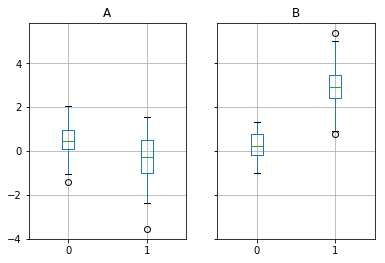

In [38]:
np.random.seed(1234)
df = pd.DataFrame(np.random.randn(50, 2))
df['g'] = np.random.choice(['A', 'B'], size=50)
df.loc[df['g'] == 'B', 1] += 3

df.groupby('g').boxplot();

## Piping function calls

Similar to the functionality provided by `DataFrame` and `Series`, functions that take `GroupBy` objects can be chained together using a `pipe` method to allow for a cleaner, more readable syntax. To read about `.pipe` in general terms, see [here](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html#basics-pipe).

Combining `.groupby` and `.pipe` is often useful when you need to reuse GroupBy objects.

# Cook book
pandas cookbook 中也有一些精巧的例子
https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html#grouping

## Basic grouping with apply

In [39]:
df = pd.DataFrame({'animal': 'cat dog cat fish dog cat cat'.split(),
                   'size': list('SSMMMLL'),
                   'weight': [8, 10, 11, 1, 20, 12, 12],
                   'adult': [False] * 5 + [True] * 2})

display(df)

# List the size of the animals with the highest weight.

display(df.groupby('animal').apply(lambda subf: subf['size'][subf['weight'].idxmax()]))

,animal,size,weight,adult
0,cat,S,8,False
1,dog,S,10,False
2,cat,M,11,False
3,fish,M,1,False
4,dog,M,20,False
5,cat,L,12,True
6,cat,L,12,True


animal
cat     L
dog     M
fish    M
dtype: object

## Apply to different items in a group

In [40]:
gb = df.groupby(['animal'])

def GrowUp(x):
    avg_weight = sum(x[x['size'] == 'S'].weight * 1.5)
    avg_weight += sum(x[x['size'] == 'M'].weight * 1.25)
    avg_weight += sum(x[x['size'] == 'L'].weight)
    avg_weight /= len(x)
    return pd.Series(['L', avg_weight, True],
                     index=['size', 'weight', 'adult'])

expected_df = gb.apply(GrowUp)
display(expected_df)

,size,weight,adult
animal,,,
cat,L,12.4375,True
dog,L,20.0000,True
fish,L,1.2500,True


## Create a value counts column and reassign back to the DataFrame

In [41]:
df = pd.DataFrame({'Color': 'Red Red Red Blue'.split(),
                   'Value': [100, 150, 50, 50]})
display(df)

df['Counts'] = df.groupby(['Color']).transform(len)
display(df)

,Color,Value
0,Red,100
1,Red,150
2,Red,50
3,Blue,50


,Color,Value,Counts
0,Red,100,3
1,Red,150,3
2,Red,50,3
3,Blue,50,1


## [Select row with maximum value from each group](http://stackoverflow.com/q/26701849/190597)

In [42]:
df = pd.DataFrame({'host': ['other', 'other', 'that', 'this', 'this'],
                   'service': ['mail', 'web', 'mail', 'mail', 'web'],
                     'no': [1, 2, 1, 2, 1]}).set_index(['host', 'service'])

mask = df.groupby(level=0).agg('idxmax')

df_count = df.loc[mask['no']].reset_index()

df_count

,host,service,no
0,other,web,2
1,that,mail,1
2,this,mail,2


- End